<a href="https://colab.research.google.com/github/viiditjain/task-7-SVM-elevatelabs/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset Shape:", X.shape)
print("Target Distribution:", y.value_counts())

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Dataset Shape: (569, 30)
Target Distribution: 1    357
0    212
Name: count, dtype: int64


In [3]:
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("\nLinear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear SVM Accuracy: 0.956140350877193


In [4]:
svm_rbf = SVC(kernel="rbf", C=1, gamma="scale")
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9473684210526315


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


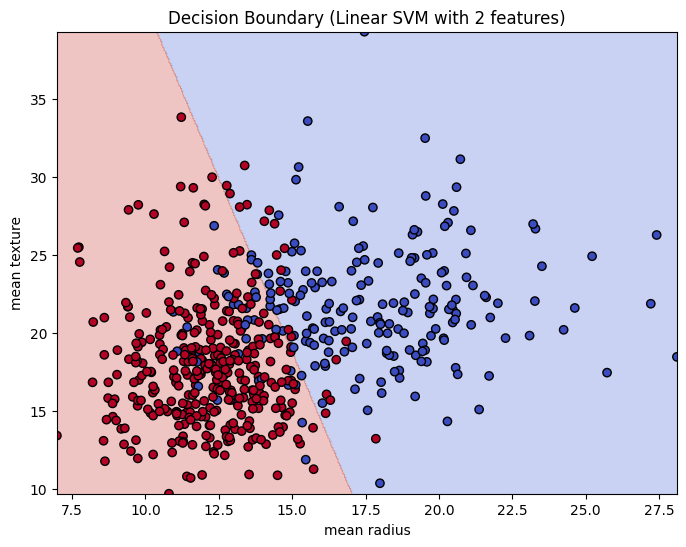

In [5]:
X_2D = X.iloc[:, :2]  # only first two features for plotting
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_2D, y, test_size=0.2, random_state=42
)

svm_plot = SVC(kernel="linear", C=1)
svm_plot.fit(X_train2, y_train2)

xx, yy = np.meshgrid(
    np.linspace(X_2D.iloc[:, 0].min(), X_2D.iloc[:, 0].max(), 500),
    np.linspace(X_2D.iloc[:, 1].min(), X_2D.iloc[:, 1].max(), 500)
)

Z = svm_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_2D.iloc[:, 0], X_2D.iloc[:, 1], c=y, edgecolors="k", cmap="coolwarm")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Decision Boundary (Linear SVM with 2 features)")
plt.show()

In [6]:
param_grid = {"C": [0.1, 1, 10], "gamma": ["scale", 0.1, 1]}
grid = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5)
grid.fit(X_train, y_train)

print("\nBest Params (RBF SVM):", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)



Best Params (RBF SVM): {'C': 10, 'gamma': 'scale'}
Best Cross-Validation Score: 0.9142857142857144


In [8]:
scores = cross_val_score(SVC(kernel="linear"), X, y, cv=5)
print("Cross-validation accuracy (Linear SVM):", scores.mean())


Cross-validation accuracy (Linear SVM): 0.9455364073901569
